In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import RFE

In [5]:
data = pd.read_csv('/content/train.csv')

In [7]:
print(data.head())

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD   

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [9]:
print(data.shape)

(1460, 81)


In [10]:
print(data.columns)

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [24]:
selected_features = ['GrLivArea', 'BedroomAbvGr', 'FullBath', 'SalePrice']
data = data[selected_features]

In [13]:
print(data.isnull().sum())

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64


In [15]:
numeric_cols = data.select_dtypes(include=['number']).columns
data[numeric_cols] = data[numeric_cols].fillna(data[numeric_cols].median())

non_numeric_cols = data.select_dtypes(exclude=['number']).columns
for col in non_numeric_cols:
    data[col] = data[col].fillna(data[col].mode()[0])

print(data)


        Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave  Grvl      Reg   
1        2          20       RL         80.0     9600   Pave  Grvl      Reg   
2        3          60       RL         68.0    11250   Pave  Grvl      IR1   
3        4          70       RL         60.0     9550   Pave  Grvl      IR1   
4        5          60       RL         84.0    14260   Pave  Grvl      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave  Grvl      Reg   
1456  1457          20       RL         85.0    13175   Pave  Grvl      Reg   
1457  1458          70       RL         66.0     9042   Pave  Grvl      Reg   
1458  1459          20       RL         68.0     9717   Pave  Grvl      Reg   
1459  1460          20       RL         75.0     9937   Pave  Grvl      Reg   

     LandContour Utilities  ... PoolArea PoolQC  Fe

# **EXPLORATORY DATA ANALYSIS**

In [18]:
print("Summary statistics:")
print(data.describe())

Summary statistics:
                Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1460.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    69.863699   10516.828082     6.099315   
std     421.610009    42.300571    22.027677    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    60.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    79.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1460.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.117123   443.639726  ...   
std       1.112799    30.202904     20.645407   180.731

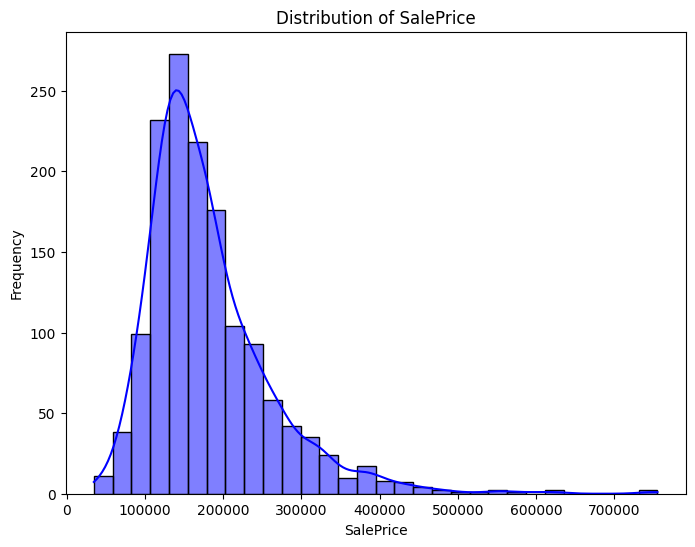

In [19]:
plt.figure(figsize=(8,6))
sns.histplot(data['SalePrice'], kde=True, color='blue', bins=30)
plt.title('Distribution of SalePrice')
plt.xlabel('SalePrice')
plt.ylabel('Frequency')
plt.show()

In [25]:
correlation_matrix = data.corr()
print("Correlation matrix:")
print(correlation_matrix['SalePrice'].sort_values(ascending=False))

Correlation matrix:
SalePrice       1.000000
GrLivArea       0.708624
FullBath        0.560664
BedroomAbvGr    0.168213
Name: SalePrice, dtype: float64


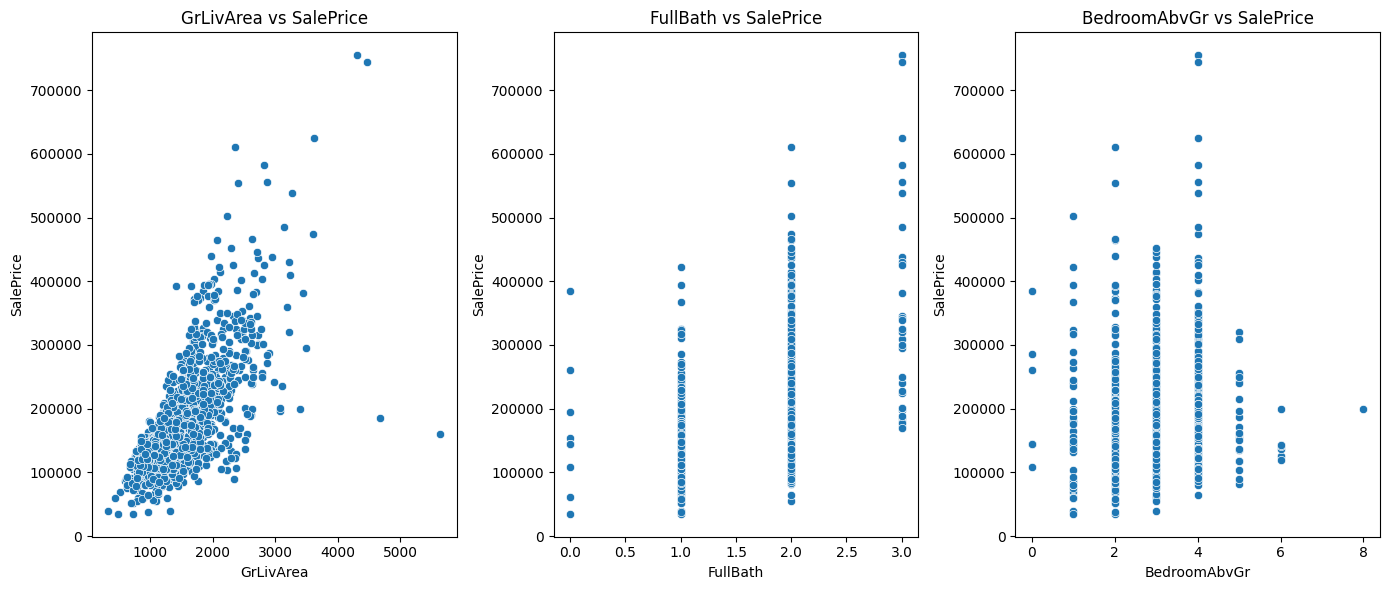

In [26]:
plt.figure(figsize=(14, 6))
plt.subplot(1, 3, 1)
sns.scatterplot(x=data['GrLivArea'], y=data['SalePrice'])
plt.title('GrLivArea vs SalePrice')

plt.subplot(1, 3, 2)
sns.scatterplot(x=data['FullBath'], y=data['SalePrice'])
plt.title('FullBath vs SalePrice')

plt.subplot(1, 3, 3)
sns.scatterplot(x=data['BedroomAbvGr'], y=data['SalePrice'])
plt.title('BedroomAbvGr vs SalePrice')

plt.tight_layout()
plt.show()


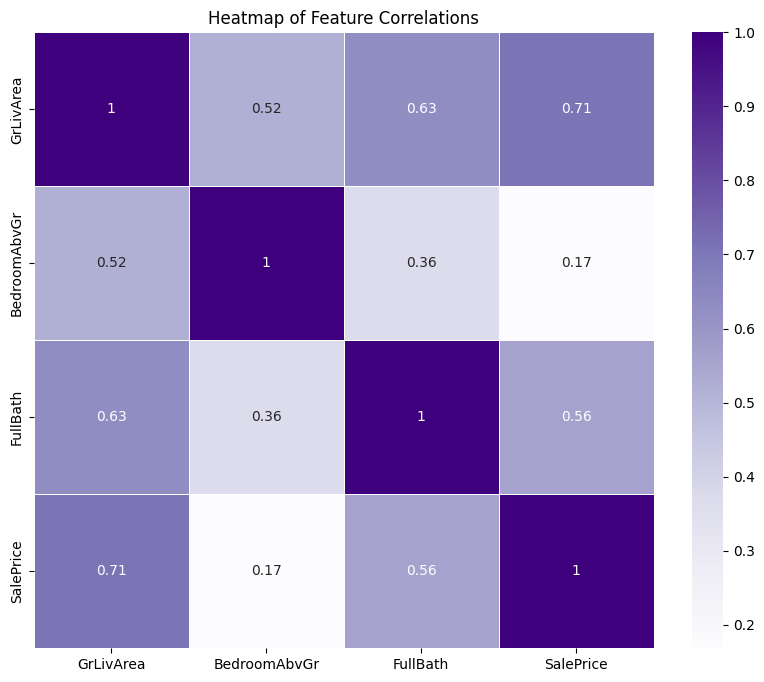

In [27]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='Purples', linewidths=0.5)
plt.title('Heatmap of Feature Correlations')
plt.show()

# **FEATURE SELECTION**

In [ ]:
X = data.drop('SalePrice', axis=1)
y = data['SalePrice']

In [ ]:
linear_model = LinearRegression()

In [ ]:
rfe = RFE(linear_model, n_features_to_select=2)
rfe = rfe.fit(X, y)

In [ ]:
selected_columns = X.columns[rfe.support_]
print("Selected features using RFE with Linear Regression:", selected_columns.tolist())

Selected features using RFE with Linear Regression: ['BedroomAbvGr', 'FullBath']


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
cross_val_scores = cross_val_score(linear_model, X, y, cv=5)
print(f'Cross-validation scores: {cross_val_scores}')
print(f'Mean cross-validation score: {cross_val_scores.mean():.2f}')

Cross-validation scores: [0.62145386 0.60156941 0.61816512 0.58870218 0.44695773]
Mean cross-validation score: 0.58


In [ ]:
linear_model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = linear_model.predict(X_test)

In [ ]:
score = linear_model.score(X_test, y_test)
print(f'R^2 Score of the linear regression model: {score:.2f}')

R^2 Score of the linear regression model: 0.63


In [ ]:
mse = mean_squared_error(y_test, y_pred)

In [ ]:
print(f'Mean Squared Error of the linear regression model: {mse:.2f}')

Mean Squared Error of the linear regression model: 2806426667.25
